In [10]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Importing the required libraries
import pandas as pa
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.optimizers import adam

In [169]:
# Reading the train.tsv into train_data1
train_data1 = pa.read_csv("/content/drive/My Drive/Lab2/Datasets/train.tsv",sep="\t")
# Reading the test.tsv into test.tsv
test_data1 = pa.read_csv("/content/drive/My Drive/Lab2/Datasets/test.tsv",sep="\t")
# Printing the shape of the datasets
print(train_data1.shape)
train_data1.head
print(test_data1.shape)
test_data1.head
# Dropping the unwanted columns
train_data1 = train_data1.drop(columns=['PhraseId', 'SentenceId'])
# Removing the non-alphabetic characters
train_data1['Phrase'] = train_data1['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
test_data1 = test_data1.drop(columns=['PhraseId', 'SentenceId'])
test_data1['Phrase'] = test_data1['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))

(156060, 4)
(66292, 3)


In [0]:
# Taking the target column and deopping it from the training data
label1=train_data1[['Sentiment']]
train_data1=train_data1.drop(columns=['Sentiment'])

In [0]:
# Tokenization on train data
max_feature1 = 4000
tokenizer = Tokenizer(num_words=max_feature1, split=' ')
tokenizer.fit_on_texts(train_data1['Phrase'].values)
X_train1 = tokenizer.texts_to_sequences(train_data1['Phrase'].values)
X_train1 = pad_sequences(X_train1)

In [0]:
# Tokenization on test data
max_feature2 = 2000
tokenizer = Tokenizer(num_words=max_feature2, split=' ')
tokenizer.fit_on_texts(test_data1['Phrase'].values)
X_test1 = tokenizer.texts_to_sequences(test_data1['Phrase'].values)
X_test1 = pad_sequences(X_test1)

In [173]:
X_train1.shape

(156060, 46)

In [174]:
X_test1.shape

(66292, 46)

In [175]:
# Performing train test and split
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label1)
Y_train1 = to_categorical(integer_encoded)
X_train, X_test, Y_train, Y_test = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(124848, 46) (124848, 5)
(31212, 46) (31212, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Creating a CNN Model
num_classes = Y_train1.shape[1]
max_words= X_train1.shape[1]
model1= Sequential()
model1.add(Embedding(max_features,100,input_length=max_words))
# Dropout 0.2% data while training
model1.add(Dropout(0.2))
# Adding a convolution layer to the model
model1.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
# Performing Maxpool to reduce size of spatial representation
model1.add(GlobalMaxPooling1D())
# Adding another input layer
model1.add(Dense(64,activation='relu'))
# Dropout 0.2% data while training
model1.add(Dropout(0.2))
model1.add(Dense(num_classes,activation='softmax'))
# Compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [177]:
# Fitting the model
history1=model1.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=512, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/10
124848/124848 [==============================] - 2s 17us/step - loss: 1.1778 - accuracy: 0.5440 - val_loss: 1.0206 - val_accuracy: 0.6002
Epoch 2/10
124848/124848 [==============================] - 2s 16us/step - loss: 0.9981 - accuracy: 0.6078 - val_loss: 0.9703 - val_accuracy: 0.6163
Epoch 3/10
124848/124848 [==============================] - 2s 15us/step - loss: 0.9527 - accuracy: 0.6254 - val_loss: 0.9491 - val_accuracy: 0.6254
Epoch 4/10
124848/124848 [==============================] - 2s 14us/step - loss: 0.9202 - accuracy: 0.6384 - val_loss: 0.9261 - val_accuracy: 0.6325
Epoch 5/10
124848/124848 [==============================] - 2s 16us/step - loss: 0.8915 - accuracy: 0.6493 - val_loss: 0.9149 - val_accuracy: 0.6374
Epoch 6/10
124848/124848 [==============================] - 2s 15us/step - loss: 0.8688 - accuracy: 0.6579 - val_loss: 0.9053 - val_accuracy: 0.6410
Epoch 7/10
124848/124848 [=============================

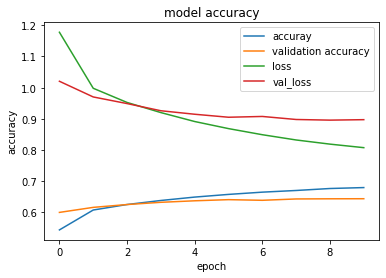

In [178]:
# Plotting acc,val_acc,loss,val_loss
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'])
plt.show()

In [196]:
# Prediction
y_predicted=model1.predict_classes(X_test1[:1])
print(y_predicted[0]," PREDICTED LABEL")

2  PREDICTED LABEL


In [197]:
# Reading the file from drive
file = pa.read_csv('/content/drive/My Drive/Lab2/Datasets/sampleSubmission.csv',sep=',')
print(file['Sentiment'].iloc[0]," ACTUAL LABEL")

2  ACTUAL LABEL


# (6) Tuning the parameters to achieve good accuracy for CNN Model

In [0]:
# Creating a CNN Model with learning rate of 0.01
model2= Sequential()
model2.add(Embedding(max_features,100,input_length=max_words))
# Dropout 0.2% data while training
model2.add(Dropout(0.2))
# Adding a convolution layer to the model
model2.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
# Performing Maxpool to reduce size of spatial representation
model2.add(GlobalMaxPooling1D())
# Adding another input layer
model2.add(Dense(128,activation='relu'))
# Dropout 0.2% data while training
model2.add(Dropout(0.2))
model2.add(Dense(num_classes,activation='softmax'))
# Compiling the model
model2.compile(loss='binary_crossentropy',optimizer=adam(lr=0.001),metrics=['accuracy'])

In [189]:
# Fitting the model
history2=model2.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=50, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/10
124848/124848 [==============================] - 16s 124us/step - loss: 0.3538 - accuracy: 0.8449 - val_loss: 0.3296 - val_accuracy: 0.8541
Epoch 2/10
124848/124848 [==============================] - 15s 119us/step - loss: 0.3232 - accuracy: 0.8566 - val_loss: 0.3183 - val_accuracy: 0.8573
Epoch 3/10
124848/124848 [==============================] - 15s 119us/step - loss: 0.3103 - accuracy: 0.8626 - val_loss: 0.3146 - val_accuracy: 0.8598
Epoch 4/10
124848/124848 [==============================] - 15s 122us/step - loss: 0.3020 - accuracy: 0.8667 - val_loss: 0.3141 - val_accuracy: 0.8595
Epoch 5/10
124848/124848 [==============================] - 15s 121us/step - loss: 0.2956 - accuracy: 0.8695 - val_loss: 0.3116 - val_accuracy: 0.8608
Epoch 6/10
124848/124848 [==============================] - 15s 122us/step - loss: 0.2911 - accuracy: 0.8713 - val_loss: 0.3130 - val_accuracy: 0.8598
Epoch 7/10
124848/124848 [=================

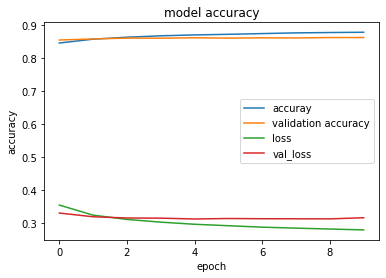

In [190]:
# Plotting acc,val_acc,loss,val_loss
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'])
plt.show()